<a href="https://colab.research.google.com/github/smurillo1/RegressaoLinearDNC/blob/main/Estudo_Regress%C3%A3oSimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#Criando dataset de tempo por vendas
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]
          }

dataset = pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


Text(0.5, 1.02, 'Reta de regressão - Tempo X Venda')

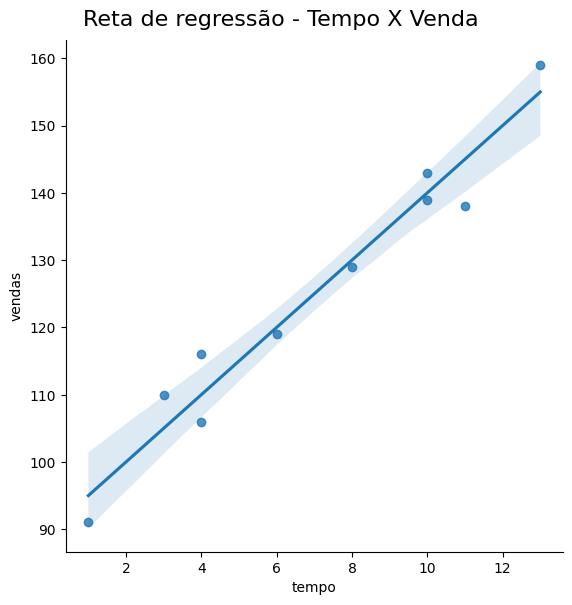

In [11]:
#Aplicando grafico de regressão para observar comportamento de vendas ao longo do tempo
from pandas.io.sql import DatabaseError

ax = sns.lmplot(x="tempo", y="vendas", data=dataset)
ax.fig.set_size_inches(6,6)
ax.fig.suptitle("Reta de regressão - Tempo X Venda", fontsize=16, y=1.02)


In [12]:
dataset.corr() # correlação

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [18]:
import statsmodels.api as sm

In [19]:
#definindo variáveis
Y = dataset.vendas #target
X = sm.add_constant(dataset.tempo) #exibindo o intercepto

In [20]:
#treinando modelo
resultado_regressao = sm.OLS(Y, X).fit()

In [24]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           1.22e-06
Time:                        14:02:06   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
#verificando residuo
dataset['Y_previsto'] = resultado_regressao.predict()
dataset['residuo'] = dataset['Y_previsto'] - dataset['vendas']
dataset.head()

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
